In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
infile = "../../Downloads/kegg_genes.mappings.csv"

In [19]:
genes_df = pd.read_csv(infile).set_index("ENTRY")

In [5]:
tmp_genes_df = genes_df.loc[:,["ENTRY", "UNIPROT_ID"]]
tmp_genes_df["nullcount"]=tmp_genes_df.UNIPROT_ID.isnull()
null_count = tmp_genes_df.loc[:,["ENTRY", "nullcount"]].groupby("ENTRY").sum().astype(int).reset_index()
all_count = tmp_genes_df.loc[:,["ENTRY"]].groupby("ENTRY").size().reset_index().rename(columns = {0:"CLUSTER_SIZE"})
cluster_info = pd.merge(null_count, all_count, on = "ENTRY", how = "outer")
cluster_info["nullpercentage"] = cluster_info["nullcount"] / cluster_info["CLUSTER_SIZE"]

In [37]:
cluster_info_indexed = cluster_info.set_index("ENTRY")
genes_df_nullinfo = pd.merge(cluster_info_indexed, genes_df, how = "outer", on = "ENTRY")

In [88]:
genes_df_nullinfo

,nullcount,CLUSTER_SIZE,nullpercentage,KEGG_ID,ALIAS,KEGG_CDS,KEGG_ORG,UNIPROT_ID
ENTRY,,,,,,,,
K00001,1604,2859,0.561035,aac:Aaci_0920,NaN,Aaci_0920,AAC,C8WUX1
K00001,1604,2859,0.561035,aacn:AANUM_0982,NaN,AANUM_0982,AACN,NaN
K00001,1604,2859,0.561035,aaco:K1I37_00955,NaN,K1I37_00955,AACO,T0CAL0
K00001,1604,2859,0.561035,aaco:K1I37_05170,NaN,K1I37_05170,AACO,T0BWK9
K00001,1604,2859,0.561035,aaco:K1I37_17460,NaN,K1I37_17460,AACO,T0D6K0
...,...,...,...,...,...,...,...,...
K27109,482,1102,0.437387,xce:Xcel_2014,NaN,Xcel_2014,XCE,D1BTQ4
K27109,482,1102,0.437387,xya:ET471_15840,NaN,ET471_15840,XYA,A0A4P6F5T3
K27109,482,1102,0.437387,xyl:ET495_06325,NaN,ET495_06325,XYL,A0A4P6ENL0


In [92]:
genes_df_nullinfo[genes_df_nullinfo.index.isin(["K27105"])]

,nullcount,CLUSTER_SIZE,nullpercentage,KEGG_ID,ALIAS,KEGG_CDS,KEGG_ORG,UNIPROT_ID
ENTRY,,,,,,,,
K27105,23,34,0.676471,maf:MAF_20420,NaN,MAF_20420,MAF,NaN
K27105,23,34,0.676471,mbb:BCG_2046c,NaN,BCG_2046c,MBB,A0A0H3MBL9
K27105,23,34,0.676471,mbk:K60_021060,NaN,K60_021060,MBK,A0A7U4BV75
K27105,23,34,0.676471,mbm:BCGMEX_2030c,NaN,BCGMEX_2030c,MBM,NaN
K27105,23,34,0.676471,mbo:BQ2027_MB2052C,dost,BQ2027_MB2052C,MBO,NaN
K27105,23,34,0.676471,mbt:JTY_2041,NaN,JTY_2041,MBT,NaN
K27105,23,34,0.676471,mbx:BCGT_1846,NaN,BCGT_1846,MBX,NaN
K27105,23,34,0.676471,mce:MCAN_20501,NaN,MCAN_20501,MCE,G0TM21
K27105,23,34,0.676471,mcq:BN44_40317,dosT,BN44_40317,MCQ,NaN


In [50]:
cluster_info_empty = cluster_info[cluster_info["nullpercentage"] == 1]#.sort_values("CLUSTER_SIZE")
cluster_info_empty[cluster_info_empty["CLUSTER_SIZE"].between(500,10000) ]

,ENTRY,nullcount,CLUSTER_SIZE,nullpercentage
252,K00280,1850,1850,1.0
1657,K01808,5744,5744,1.0
1810,K01978,4067,4067,1.0
1811,K01979,1001,1001,1.0
1813,K01981,1228,1228,1.0
...,...,...,...,...
25673,K26342,696,696,1.0
25675,K26344,634,634,1.0
25693,K26362,523,523,1.0
25717,K26386,829,829,1.0


In [9]:
cluster_info_filtered = cluster_info[cluster_info["CLUSTER_SIZE"] < 50000]
cluster_info_sorted = cluster_info_filtered.sort_values("nullpercentage")

In [10]:
entries_s = cluster_info_sorted[cluster_info_sorted["nullpercentage"] == 0].sort_values("CLUSTER_SIZE", ascending = False).iloc[:50, :]["ENTRY"]

In [13]:
cluster_info[cluster_info["CLUSTER_SIZE"] <10].sort_values("CLUSTER_SIZE", ascending = False)
# almost half the KOG clusters have over 500 genes

,ENTRY,nullcount,CLUSTER_SIZE,nullpercentage
79,K00085,5,9,0.555556
18801,K19455,2,9,0.222222
19484,K20143,7,9,0.777778
19481,K20140,1,9,0.111111
12384,K12933,6,9,0.666667
...,...,...,...,...
19547,K20206,0,1,0.000000
19494,K20153,0,1,0.000000
19493,K20152,0,1,0.000000
22401,K23068,1,1,1.000000


Text(0.5, 1.0, 'cumulative sum of genes in all clusters meeting this threshhold')

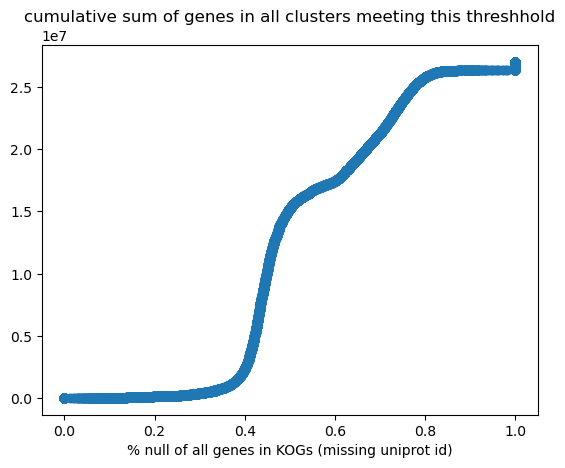

In [131]:
plt.scatter(cluster_info_sorted["nullpercentage"], cluster_info_sorted["CLUSTER_SIZE"].cumsum())
plt.xlabel("% null of all genes in KOGs (missing uniprot id)")
plt.title("cumulative sum of genes in all clusters meeting this threshhold")

## 01. Merge in uniprot scraping results: do we get more coverage? Which genes are still missing

In [186]:
def concat_allclusters(knumbers):
    paths = ["data/kog_uid/{}.tsv".format(knumber) for knumber in knumbers]
    outfilename = "data/uid_descriptors_test.tsv"
    with open(outfilename, "a") as outfile:
        for path in paths:
            try:
                with open(path, "r") as f:
                    lines = f.readlines()
                    for line in lines:
                        print(line, file=outfile)
            except:
                continue

In [193]:
knumbers_unfiltered = ["K" + str((5-len(str(i)))*"0") + str(i) for i in range(0,27110)]
concat_allclusters(knumbers_unfiltered)

In [194]:
uid_df = pd.read_csv("data/uid_descriptors_test.tsv", sep = "\t", names = ["ENTRY", "UID", "DESCRIPTOR"]).set_index("ENTRY")

In [195]:
uid_count_df = uid_df.groupby(["ENTRY", "DESCRIPTOR"]).count().reset_index().rename(columns={"UID":"UID_COUNT"}).set_index("ENTRY")

In [201]:
uid_compare = pd.merge(uid_count_df, cluster_info, on = "ENTRY", how = "outer")

In [202]:
uid_compare["%INCREASE"] = 100 * ((uid_compare["UID_COUNT"] - (uid_compare["CLUSTER_SIZE"] - uid_compare["nullcount"])) / uid_compare["CLUSTER_SIZE"])
uid_compare

,ENTRY,DESCRIPTOR,UID_COUNT,nullcount,CLUSTER_SIZE,nullpercentage,%INCREASE
0,K00001,alcohol dehydrogenase [EC:1.1.1.1],1281.0,1604.0,2859.0,0.561035,0.909409
1,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],1167.0,1730.0,2852.0,0.606592,1.577840
2,K00003,homoserine dehydrogenase [EC:1.1.1.3],4268.0,2833.0,7034.0,0.402758,0.952516
3,K00004,"(R,R)-butanediol dehydrogenase / meso-butanedi...",982.0,805.0,1776.0,0.453266,0.619369
4,K00005,glycerol dehydrogenase [EC:1.1.1.6],776.0,807.0,1592.0,0.506910,-0.565327
...,...,...,...,...,...,...,...
26436,K27105,"two-component system, NarL family, sensor hist...",9.0,23.0,34.0,0.676471,-5.882353
26437,K27106,zinc finger protein 668,101.0,211.0,307.0,0.687296,1.628664
26438,K27107,"TetR/AcrR family transcriptional regulator, mc...",29.0,42.0,73.0,0.575342,-2.739726
26439,K27108,epoxide hydrolase A/B [EC:3.3.2.-],552.0,449.0,991.0,0.453078,1.009082


In [203]:
uid_stillnone = uid_compare[uid_compare["UID_COUNT"].isnull()]
uid_stillnone#[uid_stillnone["CLUSTER_SIZE"].between(300,500)]


,ENTRY,DESCRIPTOR,UID_COUNT,nullcount,CLUSTER_SIZE,nullpercentage,%INCREASE
897,K00985,NaN,NaN,10.0,10.0,1.0,NaN
1396,K01516,NaN,NaN,4.0,4.0,1.0,NaN
1598,K01742,NaN,NaN,2.0,2.0,1.0,NaN
1678,K01828,NaN,NaN,3.0,3.0,1.0,NaN
1810,K01977,NaN,NaN,26058.0,26058.0,1.0,NaN
...,...,...,...,...,...,...,...
26357,K27026,NaN,NaN,3.0,3.0,1.0,NaN
26358,K27027,NaN,NaN,3.0,3.0,1.0,NaN
26380,K27049,NaN,NaN,24.0,24.0,1.0,NaN
26382,K27051,NaN,NaN,3.0,3.0,1.0,NaN


In [204]:
sum(uid_compare["UID_COUNT"] < uid_compare["CLUSTER_SIZE"] - uid_compare["nullcount"])

3926

In [205]:
uid_compare[uid_compare["%INCREASE"].between(-50, 50)]["%INCREASE"]

0        0.909409
1        1.577840
2        0.952516
3        0.619369
4       -0.565327
           ...   
26436   -5.882353
26437    1.628664
26438   -2.739726
26439    1.009082
26440    0.272232
Name: %INCREASE, Length: 25802, dtype: float64

(array([ 188.,  344.,  628., 1111., 6462., 9949., 4370.,  869.,  400.,
         253.]),
 array([-5. , -3.9, -2.8, -1.7, -0.6,  0.5,  1.6,  2.7,  3.8,  4.9,  6. ]),
 <BarContainer object of 10 artists>)

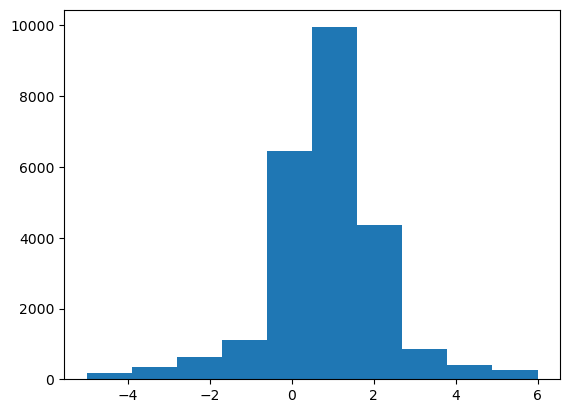

In [207]:
plt.hist(uid_compare[uid_compare["%INCREASE"].between(-5, 6)]["%INCREASE"])